<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Parcial3/Punto1LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demostraciones

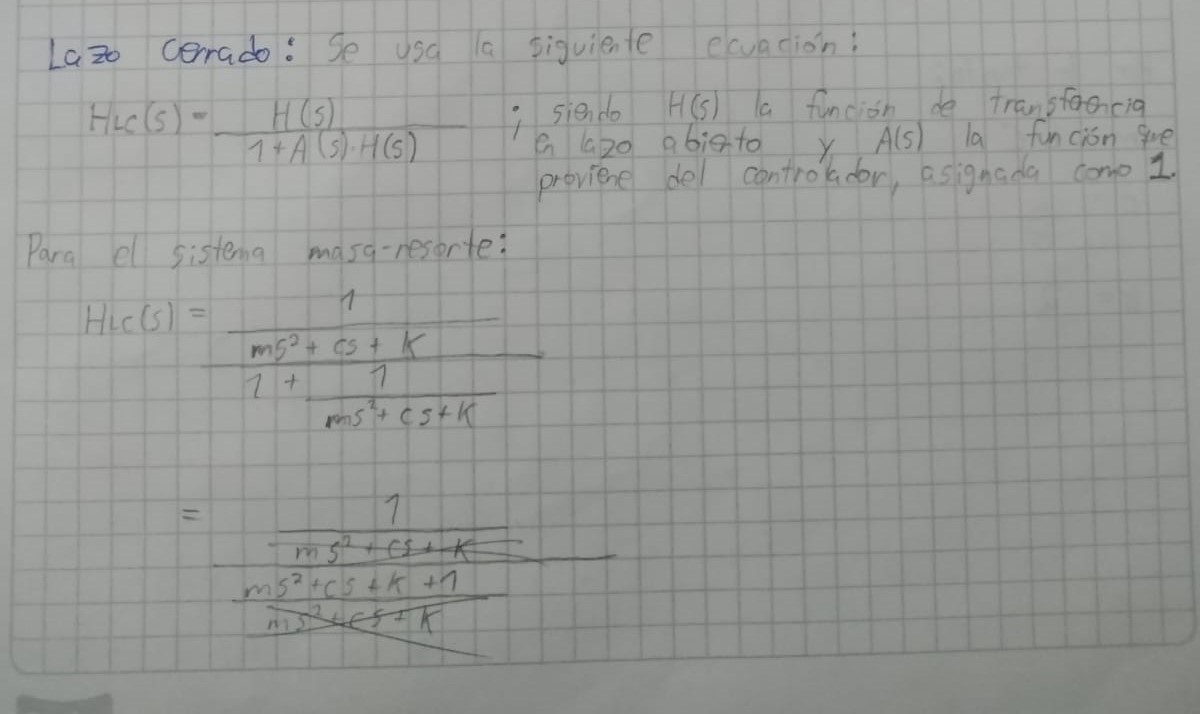

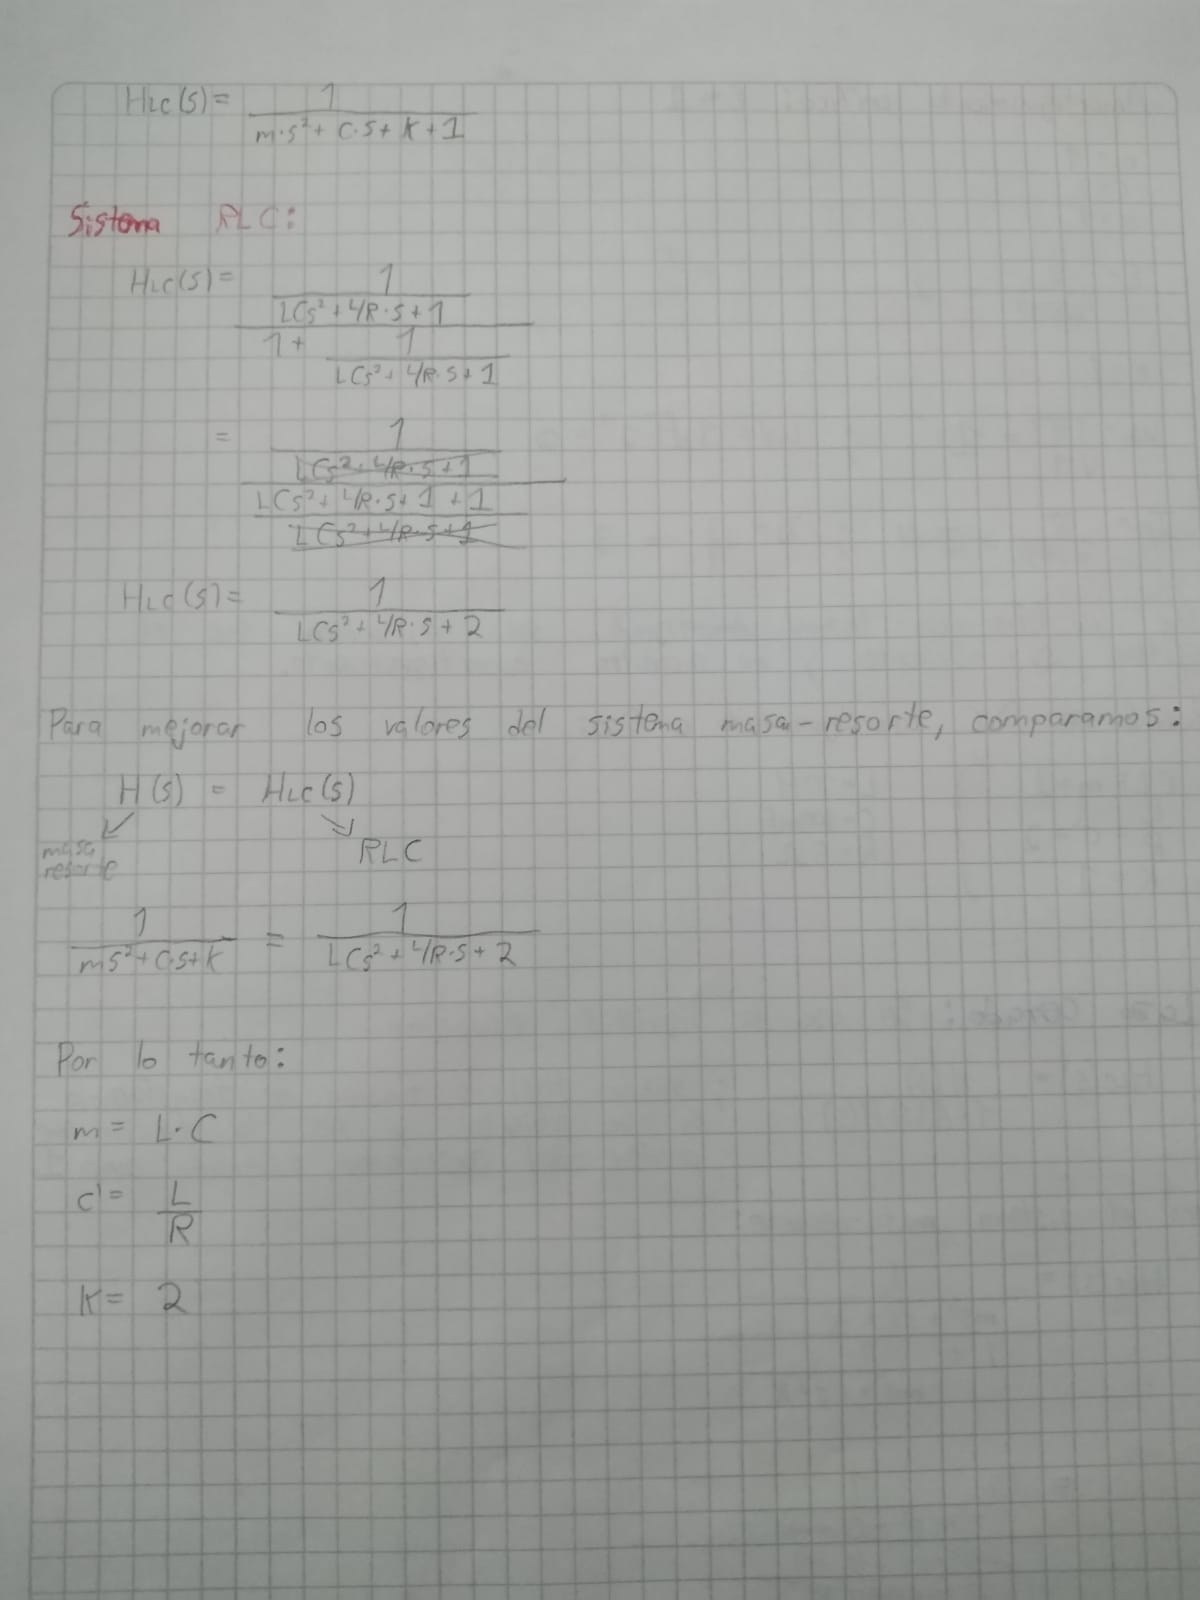

In [1]:
import numpy as np
import sympy as sym
sym.init_printing()
import matplotlib.pyplot as plt

Sistema Subamortiguado

In [2]:
#definir las variables de la función de transferencia
L, C, R = sym.symbols("L C R", real = True, positive = True)
s = sym.symbols("s", complex = True)

#sistema subamortiguado RLC
#forma canónica del SLIT
a2 = L*C
a1 = L/R
a0 = 2

k = 1/a0 #ganancia
Wn = sym.sqrt(a0/a2) #frecuencia natural no amortiguada
FA = a1 /(2*sym.sqrt(a0*a2)) #factor de amortiguamiento
Wd = Wn*sym.sqrt(1-FA**2) #frecuencia natural amortiguada

H = (k*Wn**2)/(s**2 + 2*FA*Wn*s + Wn**2)
print("La función de transferencia es: ")
H

La función de transferencia es: 


        1.0         
────────────────────
    ⎛ 2    s     2 ⎞
C⋅L⋅⎜s  + ─── + ───⎟
    ⎝     C⋅R   C⋅L⎠

In [3]:
#cálculo de los polos
p1 = -FA*Wn + 1j*Wn*sym.sqrt(1-FA**2)
p2 = -FA*Wn - 1j*Wn*sym.sqrt(1-FA**2)
print("Los polos son: ")
print(p1)
print(p2)

Los polos son: 
-1/(2*C*R) + 1.0*sqrt(2)*I*sqrt(1 - L/(8*C*R**2))/(sqrt(C)*sqrt(L))
-1/(2*C*R) - 1.0*sqrt(2)*I*sqrt(1 - L/(8*C*R**2))/(sqrt(C)*sqrt(L))


In [4]:
#en un sistema subamortiguado el factor de amortiguamiento debe ser mayor a 0 y menor a 1
#reemplazamos valores
values = {L: 40, R:20, C:100*10**-3} #si tomamos los valores antes hallados en lazo abierto
values

{C: 0.1, L: 40, R: 20}

In [5]:
#para calcular los polocs y ceros
print('p1=',p1.subs(values))
print('p2=',p2.subs(values))
print('FA=',FA.subs(values))
print('omega_n=',Wn.subs(values))

p1= -0.25 + 0.467707173346743*sqrt(2)*I
p2= -0.25 - 0.467707173346743*sqrt(2)*I
FA= 0.158113883008419*sqrt(5)
omega_n= 0.316227766016838*sqrt(5)


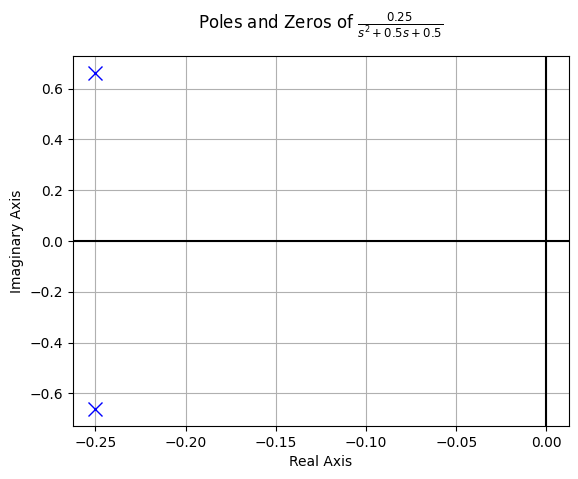

In [6]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(values))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

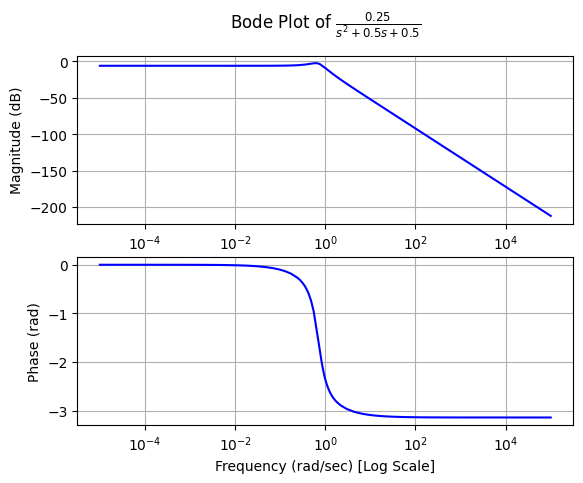

In [7]:
bode_plot(tf1)

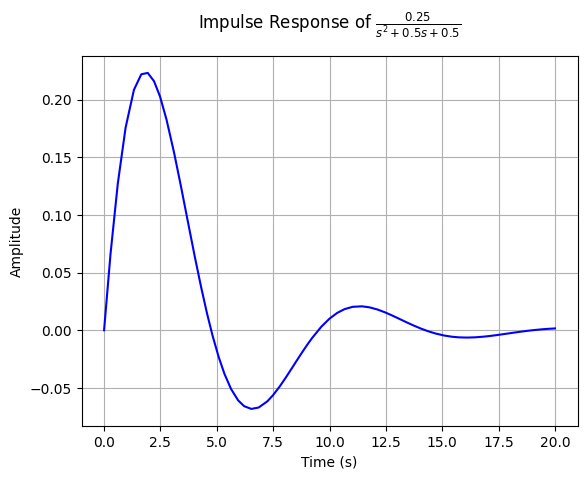

In [8]:
impulse_response_plot(tf1,upper_limit=5/(FA.subs(values)*Wn.subs(values)))

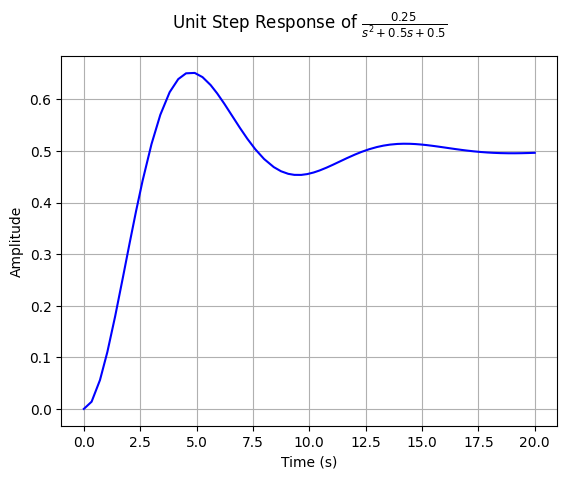

In [9]:
step_response_plot(tf1,upper_limit=5/(FA.subs(values)*Wn.subs(values)))

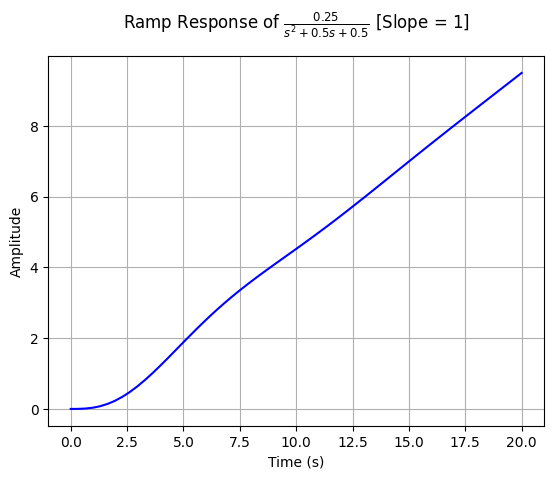

In [10]:
ramp_response_plot(tf1,upper_limit=5/(FA.subs(values)*Wn.subs(values)))

Sistema Sobreamortiguado

In [11]:
#sistema sobreamortiguado
#forma canónica del SLIT

L1, C1, R1 = sym.symbols("L1 C1 R", real = True, positive = True)
A2 = L1*C1
A1 = L1/R1
A0 = 2

k = 1/A0 #ganancia
wn = sym.sqrt(A0/A2) #frecuencia natural no amortiguada
fa = A1 /(2*sym.sqrt(A0*A2)) #factor de amortiguamiento
wd = wn*sym.sqrt(1-fa**2) #frecuencia natural amortiguada

G = (k*wn**2)/(s**2 + 2*fa*wn*s + wn**2)
print("La función de transferencia en su forma canónica es: ")
G

La función de transferencia en su forma canónica es: 


           1.0           
─────────────────────────
      ⎛ 2    s       2  ⎞
C₁⋅L₁⋅⎜s  + ──── + ─────⎟
      ⎝     C₁⋅R   C₁⋅L₁⎠

In [12]:
p1 = -fa*wn + 1j*wn*sym.sqrt(1-fa**2)
p2 = -fa*wn - 1j*wn*sym.sqrt(1-fa**2)
p1

                         _____________
                        ╱        L₁   
           1.0⋅√2⋅ⅈ⋅   ╱  1 - ─────── 
                      ╱             2 
    1               ╲╱        8⋅C₁⋅R  
- ────── + ───────────────────────────
  2⋅C₁⋅R            ____   ____       
                  ╲╱ C₁ ⋅╲╱ L₁        

In [13]:
#en un sistema sobreamortiguado el factor de amortiguamiento debe ser mayor a 1
#reemplazamos valores
values1 = {L1:10, C1:100*10**-3, R1:2.5}
values1

{C₁: 0.1, L₁: 10, R: 2.5}

In [14]:
print('p1=',p1.subs(values1))
print('p2=',p2.subs(values1))
print('xi=',fa.subs(values1))
print('omega_n=',wn.subs(values1))

p1= -2.0 - 1.0*sqrt(2)
p2= -2.0 + 1.0*sqrt(2)
xi= 0.632455532033676*sqrt(5)
omega_n= 0.632455532033676*sqrt(5)


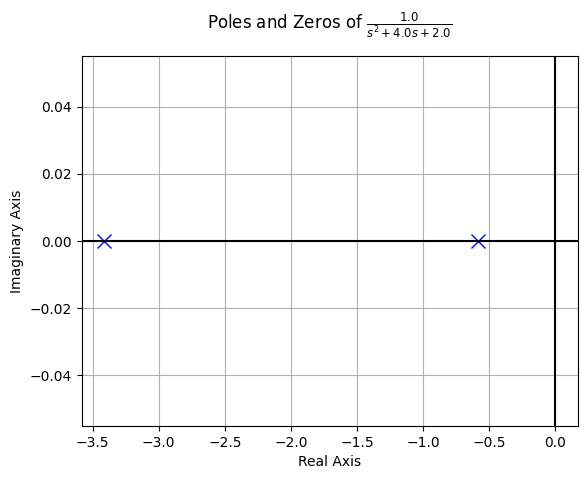

In [15]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(G.subs(values1))

tf2 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf2)

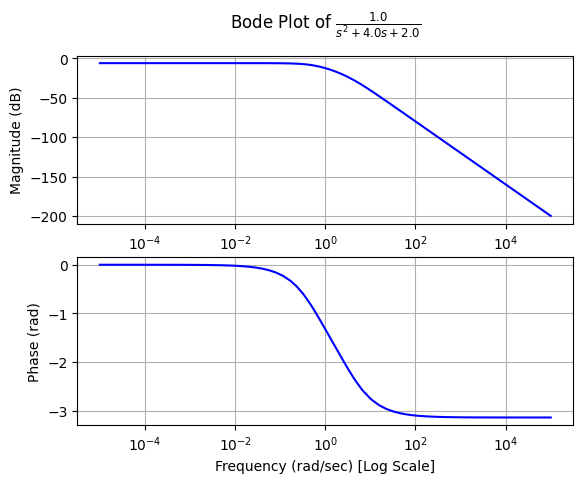

In [16]:
bode_plot(tf2)

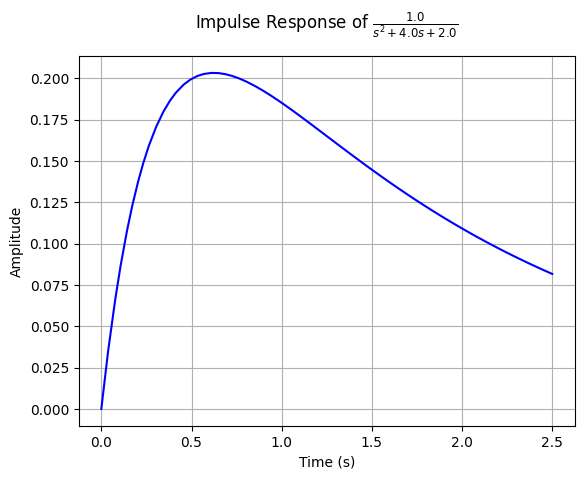

In [17]:
impulse_response_plot(tf2,upper_limit=5/(fa.subs(values1)*wn.subs(values1)))

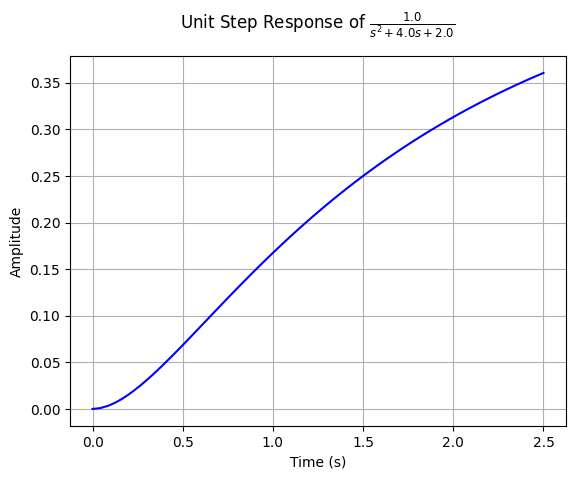

In [18]:
step_response_plot(tf2,upper_limit=5/(fa.subs(values1)*wn.subs(values1)))

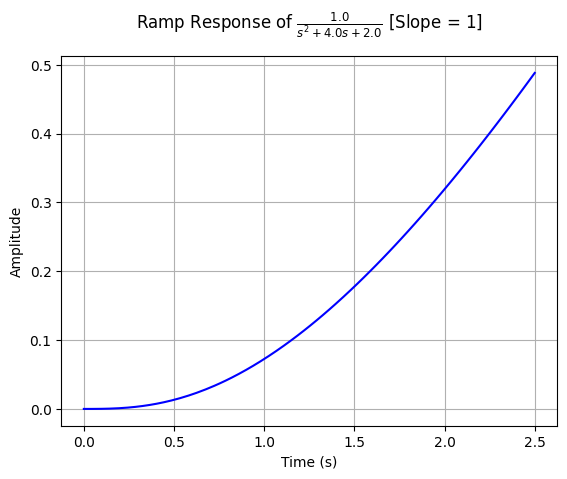

In [19]:
ramp_response_plot(tf2,upper_limit=5/(fa.subs(values1)*wn.subs(values1)))

Sistema de amortiguamiento crítico

In [20]:
#definir las variables de la función de transferencia
L2, C2, R2 = sym.symbols("L2 C2 R2", real = True, positive = True)
s = sym.symbols("s", complex = True)

#sistema de amortiguamiento crítco RLC
#forma canónica del SLIT
a_2 = L2*C2
a_1 = L2/R2
a_0 = 2

k = 1/a_0 #ganancia
W_n = sym.sqrt(a_0/a_2) #frecuencia natural no amortiguada
Fa = a_1 /(2*sym.sqrt(a_0*a_2)) #factor de amortiguamiento
Wd = Wn*sym.sqrt(1-Fa**2) #frecuencia natural amortiguada

F = (k*W_n**2)/(s**2 + 2*Fa*W_n*s + W_n**2)
print("La función de transferencia es: ")
F

La función de transferencia es: 


           1.0            
──────────────────────────
      ⎛ 2     s       2  ⎞
C₂⋅L₂⋅⎜s  + ───── + ─────⎟
      ⎝     C₂⋅R₂   C₂⋅L₂⎠

In [21]:
#cálculo de los polos
p1 = -Fa*W_n + 1j*W_n*sym.sqrt(1-Fa**2)
p2 = -Fa*W_n - 1j*Wn*sym.sqrt(1-Fa**2)
print("Los polos son: ")
print(p1)
print(p2)

Los polos son: 
-1/(2*C2*R2) + 1.0*sqrt(2)*I*sqrt(1 - L2/(8*C2*R2**2))/(sqrt(C2)*sqrt(L2))
-1/(2*C2*R2) - 1.0*sqrt(2)*I*sqrt(1 - L2/(8*C2*R2**2))/(sqrt(C)*sqrt(L))


In [22]:
#en un sistema de amotiguamiento crítico el factor de amortiguamiento debe ser igual a 1
#reemplazamos valores
values2 = {L2:10, C2:100*10**-3, R2:5}
values2

{C₂: 0.1, L₂: 10, R₂: 5}

In [23]:
print('p1=',p1.subs(values2))
print('p2=',p2.subs(values2))
print('Fa=',Fa.subs(values2))
print('omega_n=',W_n.subs(values2))

p1= -1.0 + 0.707106781186547*sqrt(2)*I
p2= -1.0 - 0.447213595499958*sqrt(5)*I/(sqrt(C)*sqrt(L))
Fa= 0.316227766016838*sqrt(5)
omega_n= 0.632455532033676*sqrt(5)


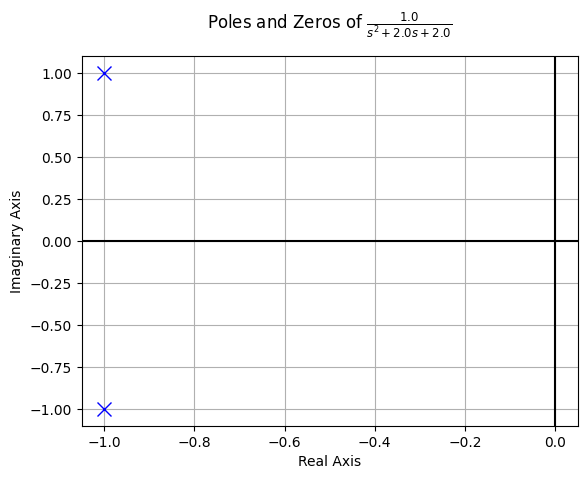

In [24]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(F.subs(values2))

tf3 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf3)

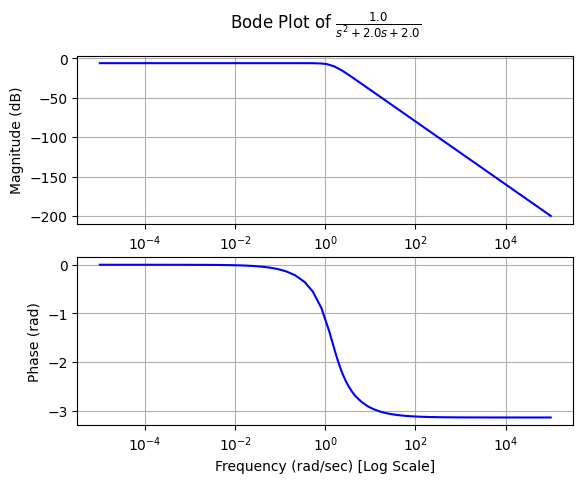

In [25]:
bode_plot(tf3)

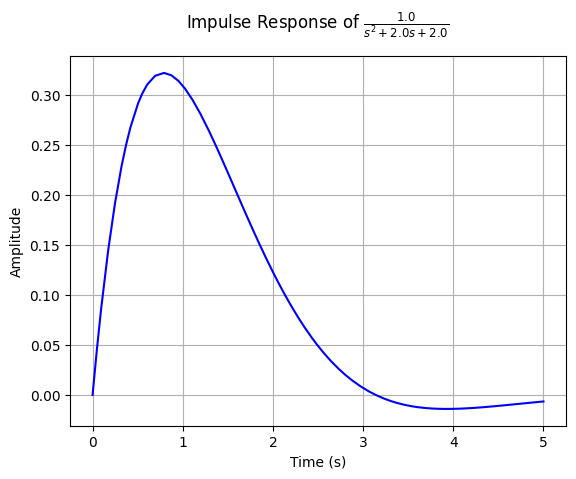

In [26]:
impulse_response_plot(tf3,upper_limit=5/(Fa.subs(values2)*W_n.subs(values2)))

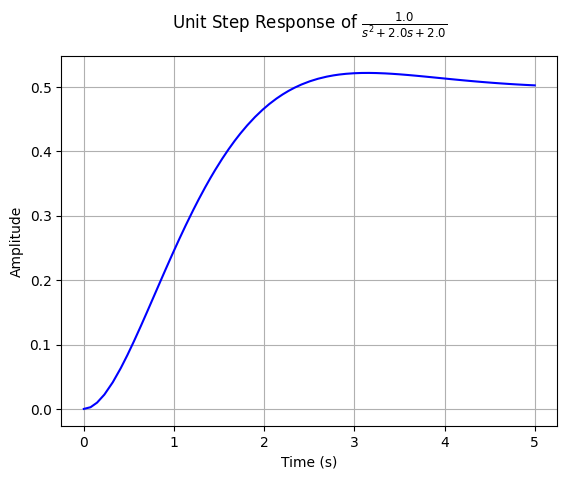

In [27]:
step_response_plot(tf3,upper_limit=5/(Fa.subs(values2)*W_n.subs(values2)))